__Домашняя работа к уроку №7__

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

Я выбрал датасет с данными о покупке клиентом страховки путешественника с kaggle.

In [23]:
import numpy as np
import pandas as pd

In [24]:
from google.colab import files
uploaded = files.upload()

Saving TravelInsurancePred.csv to TravelInsurancePred (4).csv


In [27]:
df = pd.read_csv('TravelInsurancePred (4).csv', sep=',')

df.head()

,id,Age,Emp_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


2. Сделать обзорный анализ выбранного датасета

In [28]:
df.describe()

,id,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Датасет содержит данных о 1987 клиентах возрастом от 25 до 35 лет среднего достатка, которые купили или не купили страховку путешественника.

Посмотрим на соотношение классов:

In [29]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

Страховку покупали примерно в трети случаев.

Проверим есть ли в данных пропуски:

In [30]:
df.isna().sum()

id                     0
Age                    0
Emp_Type               0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Уберем лишние столбцы и поработаем с категориальными признаками.

In [31]:
df = df.drop('id', axis=1)

In [32]:
df['Emp_Type'].unique()
df['Emp_Type'] = df['Emp_Type'].map({'Government Sector': 1, 'Private Sector/Self Employed': 0})

In [33]:
df['GraduateOrNot'].unique()
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})

In [34]:
df['FrequentFlyer'].unique()
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})

In [35]:
df['EverTravelledAbroad'].unique()
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

In [36]:
df.head(3)

,Age,Emp_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1


3. Обучить любой классификатор (какой вам нравится)

Разобьем данные на тренировочную и тестовую выборки:

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='TravelInsurance'), 
                                                    df['TravelInsurance'], test_size=0.3, random_state=12)

Обучим модель RandomForestClassifier:

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=15)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=15)

In [39]:
y_pred = model.predict(X_test)

4. разобраться с SHAP и построить важности признаков для:

*   всего тестового набора данных (summary_plot - дать интерпретацию)
*   для 5 случайных объектов из тестового набора


In [40]:
!pip install shap

     |████████████████████████████████| 564 kB 13.9 MB/s 


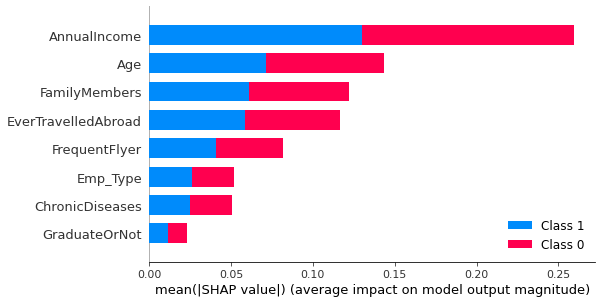

In [41]:
import shap

# строим модель объяснения в SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# покажем объяснение
shap.initjs() # для работы в колабе
shap.summary_plot(shap_values, X_test)

Как видно из суммарной диаграммы, наибольший вклад в принятие решения о классе объекта вносят признаки годового дохода, возраста, фактов путешествия за границу, количества родственнников.

Проанализируем целевой класс:

Explained expected value: [[-0.02180718  0.02714779  0.00922411 ...  0.05845172 -0.01546777
  -0.04553481]
 [-0.02828189 -0.00735515 -0.00460402 ...  0.06474745 -0.00512403
  -0.01829533]
 [ 0.06946702  0.00431818  0.01605934 ... -0.03026107  0.00955993
  -0.01624904]
 ...
 [ 0.03518235  0.01636477 -0.01832394 ...  0.05933207  0.17796559
  -0.05013301]
 [-0.03053649  0.0179617  -0.00332524 ...  0.07884327 -0.02527843
  -0.01685734]
 [-0.10020526  0.01371158 -0.0241271  ...  0.008052   -0.05715849
  -0.03038039]]


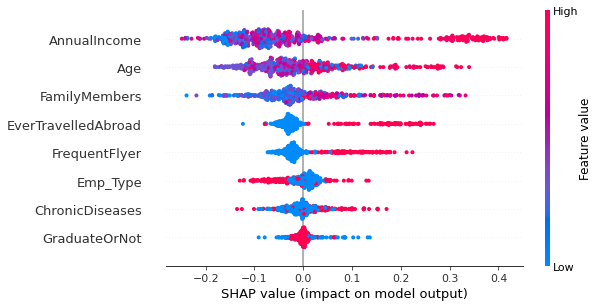

In [42]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f'Explained expected value: {shap_values}')

shap.summary_plot(shap_values, X_test)

Итак, отдельно по признакам:

*   Люди с высоким годовым доходом охотнее покупают старховку, но их немного 
*   Чем выше возраст клиента, тем вероятнее он купит страховку
*   Люди, которые не ездят за границу, не покупают страховку
*   Чем больше родственников у клиента, тем вероятнее он купит страховку
*   Страховку покупают только те, кто часто летает
*   Клиенты с хроническими заболеваниями чаще покупают страховку
*   Тип занятости клиента и его образование не играют большой роли



Теперь возьмем 5 случайных объектов из набора данных.

In [70]:
shap_values_all = explainer.shap_values(X_train)[1]
shap_values_all

array([[-0.06164181, -0.01053282, -0.0072977 , ..., -0.02320593,
        -0.02322978, -0.03267756],
       [-0.10701018,  0.01249262, -0.02510676, ...,  0.00856061,
        -0.04394717, -0.02359648],
       [-0.10274761, -0.00539242, -0.0098671 , ..., -0.0180433 ,
         0.0737    , -0.04952925],
       ...,
       [ 0.04998611,  0.00817367, -0.00054877, ...,  0.02126833,
        -0.01560644, -0.01961629],
       [ 0.05780198,  0.01681673,  0.00403134, ...,  0.00539046,
        -0.01608234,  0.2511782 ],
       [ 0.05045797,  0.02363973, -0.03651167, ...,  0.00797898,
        -0.04927727, -0.01341275]])

In [85]:
shap.initjs()
idx = 1
shap.force_plot(explainer.expected_value[0], shap_values_all[idx,:], X_train.iloc[idx,:])

Выше видим, что у данного клиента низкая вероятность покупки страховки (показатель shap = 0.33) и видим вклад признаков, в этот результат.
- Клиент довольно молод
- Доход клиента невысокий

In [83]:
shap.initjs()
idx = 10
shap.force_plot(explainer.expected_value[0], shap_values_all[idx,:], X_train.iloc[idx,:])

Выше видим, что у данного клиента низкая вероятность покупки страховки (показатель shap = 0.3) и видим вклад признаков, в этот результат.
- У клиента небольшая семья
- Доход клиента невысокий

In [84]:
shap.initjs()
idx = 100
shap.force_plot(explainer.expected_value[0], shap_values_all[idx,:], X_train.iloc[idx,:])

Выше видим, что у данного клиента довольно большая вероятность покупки страховки (показатель shap = 0.54) и видим вклад признаков, в этот результат.
- Клиент имеет хороший доход
- Клиент ездил за границу

In [86]:
shap.initjs()
idx = 500
shap.force_plot(explainer.expected_value[0], shap_values_all[idx,:], X_train.iloc[idx,:])

Выше видим, что у данного клиента низкая вероятность покупки страховки (показатель shap = 0.29) и видим вклад признаков, в этот результат.
- Доход клиента невысокий
- Клиент молод

In [87]:
shap.initjs()
idx = 1000
shap.force_plot(explainer.expected_value[0], shap_values_all[idx,:], X_train.iloc[idx,:])

Выше видим, что у данного клиента большая вероятность покупки страховки (показатель shap = 1.19) и видим вклад признаков, в этот результат.
- У клиента большая семья
- Возраст клиента больше, чем у большинства в выборке
- Клиент имеет хронические заболевания